In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Exchange_rate.csv", header=None)


In [3]:
data.head()

,0,1
0,Date,Exchange Rate
1,12-08-2019,0.8919
2,13-08-2019,0.8943
3,14-08-2019,0.8973
4,15-08-2019,0.9004


In [4]:
data.columns = ['Date', 'Exchange_rate']

In [5]:
data.head()

,Date,Exchange_rate
0,Date,Exchange Rate
1,12-08-2019,0.8919
2,13-08-2019,0.8943
3,14-08-2019,0.8973
4,15-08-2019,0.9004


In [6]:
data = data.iloc[1:]

In [7]:
data.head()

,Date,Exchange_rate
1,12-08-2019,0.8919
2,13-08-2019,0.8943
3,14-08-2019,0.8973
4,15-08-2019,0.9004
5,16-08-2019,0.9016


In [8]:
data['Date']  = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [9]:
data.head()

,Date,Exchange_rate
1,2019-08-12,0.8919
2,2019-08-13,0.8943
3,2019-08-14,0.8973
4,2019-08-15,0.9004
5,2019-08-16,0.9016


In [10]:
### Reset the Index as first column
data = data.set_index('Date', drop=True)

In [11]:
data.head()

,Exchange_rate
Date,
2019-08-12,0.8919
2019-08-13,0.8943
2019-08-14,0.8973
2019-08-15,0.9004
2019-08-16,0.9016


In [12]:
data.dtypes

Exchange_rate    object
dtype: object

In [13]:
data['Exchange_rate'] = pd.to_numeric(data['Exchange_rate'], errors = 'coerce' )

In [14]:
data.head()

,Exchange_rate
Date,
2019-08-12,0.8919
2019-08-13,0.8943
2019-08-14,0.8973
2019-08-15,0.9004
2019-08-16,0.9016


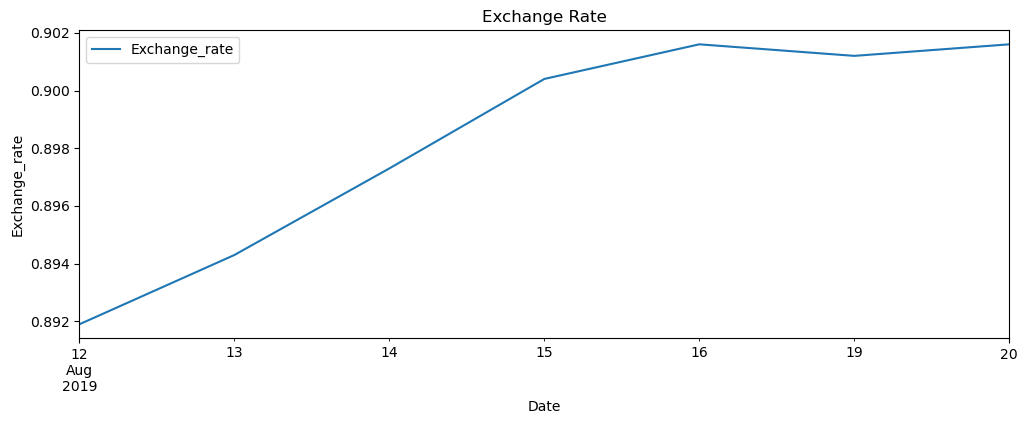

In [15]:
### Plot The Time Series Data As Below

data.plot(figsize = (12,4))
plt.legend(loc='best')
plt.title('Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange_rate')
plt.show(block = False)

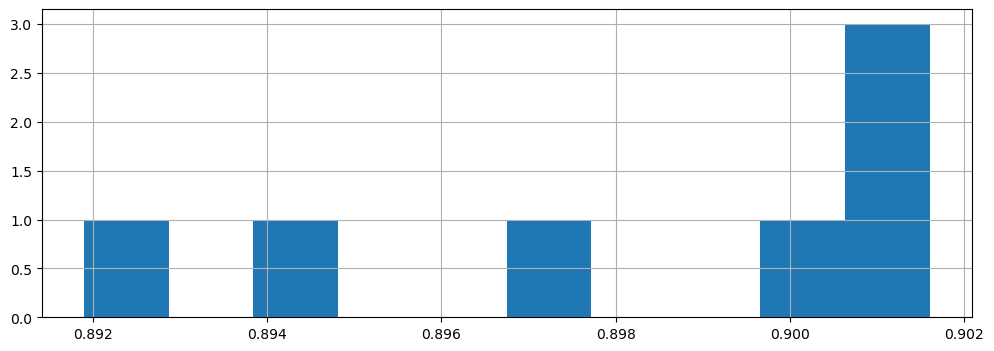

In [16]:
fig = data.Exchange_rate.hist(figsize=(12,4))

### Build And Evaluate Time Series Forecast

### Spliiting and Evalueate the time series into training and test set

In [17]:
train_len = 5
train = data[0:train_len]
test = data[train_len:]

In [18]:
len(train)

5

### Naive Method


In [19]:
y_hat_naive = test.copy()
## Calculating the next value based on the naive method
y_hat_naive['naive_forecast'] = train['Exchange_rate'][train_len - 1]

#### Naive Method - Plot Test and Forecast

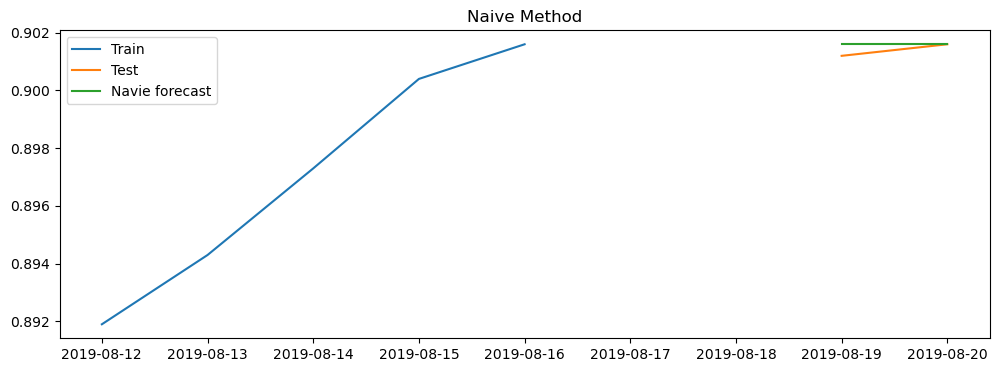

In [20]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange_rate'], label = 'Train')
plt.plot(test['Exchange_rate'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label='Navie forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate the RMSE and MAPE to evaluate forecast ( Naive Method)

In [21]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange_rate'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange_rate']-y_hat_naive['naive_forecast'])/test['Exchange_rate'])*100,2)
results = pd.DataFrame({'Method' :['Naive method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.0,0.02


In [22]:
print('Accuracy', (1-(mape/100)) *100)

Accuracy 99.98


### Simple Average Method

In [23]:
y_hat_avg = test.copy()
###Caluclate the next value based on the simple average method.
y_hat_avg['avg_forecast'] = train['Exchange_rate'].mean()

### Plot Train , Test and Forecast - Simple Average Method

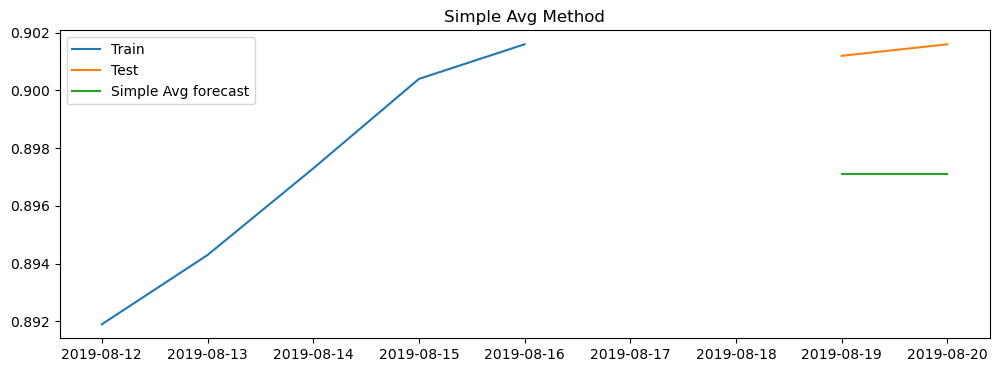

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange_rate'], label = 'Train')
plt.plot(test['Exchange_rate'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Avg forecast')
plt.legend(loc='best')
plt.title("Simple Avg Method")
plt.show()

### Calculate RMSE and MAPE to evaluate forecast - Simple Average Method

In [25]:
rmse = np.sqrt(mean_squared_error(test['Exchange_rate'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange_rate']-y_hat_avg['avg_forecast'])/test['Exchange_rate'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple avg method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,0.0,0.02
0,Simple avg method,0.0,0.48


In [26]:
print('Accuracy', (1-(mape/100)) *100)

Accuracy 99.52


### Simple Moving Average

In [27]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Exchange_rate'].rolling(ma_window).mean() #Rolling 12 month average
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

#### Plot Train, Test and Forecast - Simple Moving Average method

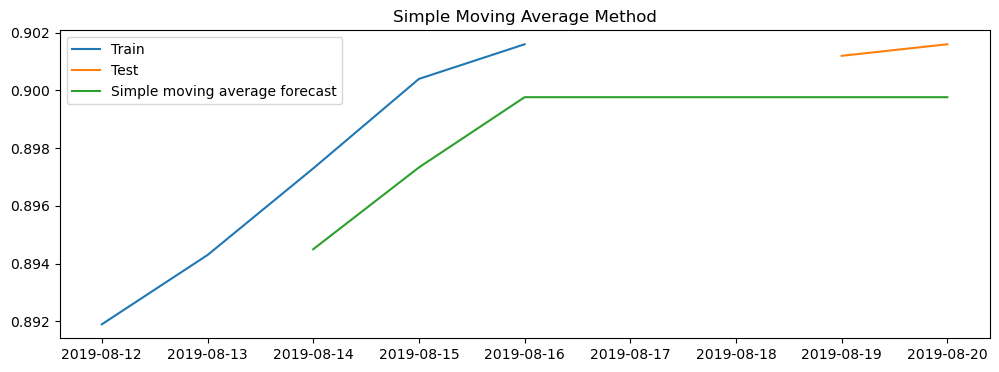

In [28]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange_rate'], label = 'Train')
plt.plot(test['Exchange_rate'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### Calculate RMSE, MAPE to evaluate forecast

In [29]:
rmse = np.sqrt(mean_squared_error(test['Exchange_rate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange_rate']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange_rate'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,0.0,0.02
0,Simple avg method,0.0,0.48
0,Simple Moving Average Method,0.0,0.18


In [30]:
print('Accuracy', (1-(mape/100)) * 100)

Accuracy 99.82
